Dataset Overview
The Pokémon dataset contains information about 800+ Pokémon across 8 generations. Each Pokémon has various attributes including type, base stats, generation, and legendary status.

Key Features:

Name: Pokémon name

Type 1, Type 2: Primary and secondary types

HP, Attack, Defense, Sp. Atk, Sp. Def, Speed: Base stats

Generation: Which generation the Pokémon belongs to

Legendary: Whether the Pokémon is legendary

pokemon-analysis/
├── data/pokemon.csv
├── notebooks/analysis.ipynb
├── src/
│   ├── data_processing.py
│   ├── visualization.py
│   └── modeling.py
├── requirements.txt
└── README.md

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Load the dataset
df = pd.read_csv(r'C:\Users\tavan\Downloads\archive\Pokemon.csv')

# Initial exploration
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

df = pd.read_csv(r"C:\Users\tavan\Downloads\archive\Pokemon.csv")

Dataset shape: (800, 13)

Columns: ['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']

Data types:
#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

Missing values:
#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [12]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set(style="whitegrid")

In [9]:
df.head(100) 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,88,Grimer,Poison,NaN,325,80,80,50,40,50,25,1,False
96,89,Muk,Poison,NaN,500,105,105,75,65,100,50,1,False
97,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False


In [53]:
# 3. Explore Dataset
print("Shape of dataset:", df.shape)
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
print(df.describe())



Shape of dataset: (800, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None

Missing values:
#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generatio

In [51]:
def prepare_ml_data(df):
    
    # Fill missing values in Type 2
    df['Type 2'] = df['Type 2'].fillna('None')
    
    # Select features for prediction
    features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    X = df[features]
    
    # Target variable: Pokémon Type 1
    y = df['Type 1']
    
    # Encode categorical target to numeric
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    print(f"Features used: {features}")
    print(f"Target classes: {len(le.classes_)} types")
    print(f"First 5 types: {le.classes_[:5]}")
    
    return X, y_encoded, le, features

# Prepare the data
X, y, label_encoder, feature_names = prepare_ml_data(df)

Features used: ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
Target classes: 18 types
First 5 types: ['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy']


## Data Visualization
Let's visualize Pokémon types, stats, and compare their strengths.


Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


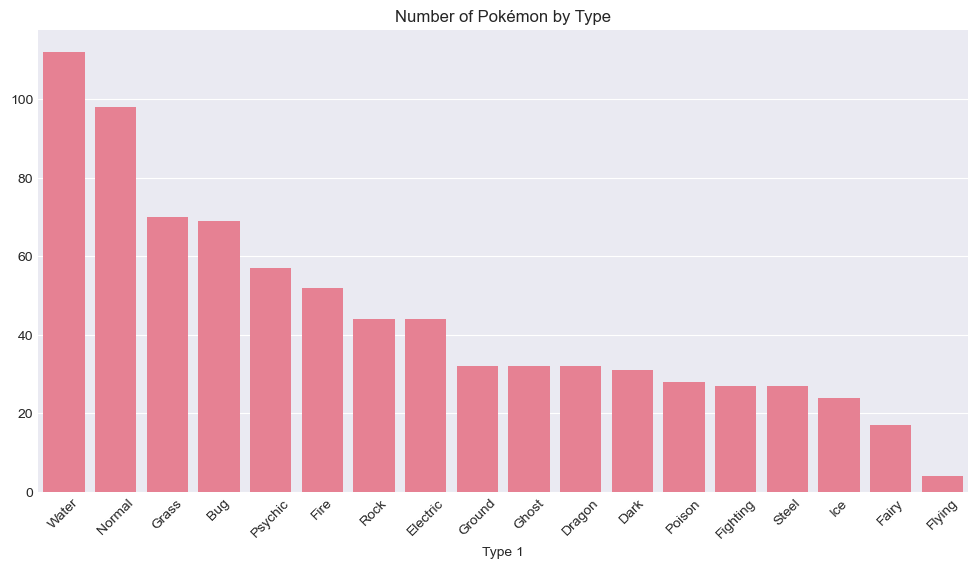

In [6]:
type_counts = df['Type 1'].value_counts()
print(type_counts)

plt.figure(figsize=(12,6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Number of Pokémon by Type")
plt.xticks(rotation=45)
plt.show()



Legendary
False    735
True      65
Name: count, dtype: int64


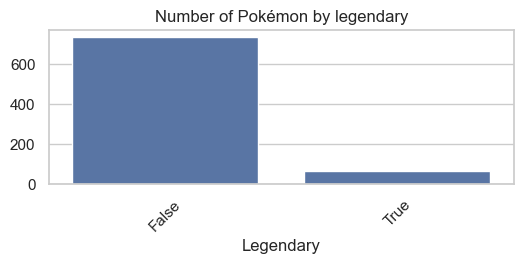

In [34]:
legendary_counts=df['Legendary'].value_counts()
print(legendary_counts)
plt.figure(figsize=(6,2))
sns.barplot(x=legendary_counts.index, y=legendary_counts.values)
plt.title("Number of Pokémon by legendary")
plt.xticks(rotation=45)
plt.show()


Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64


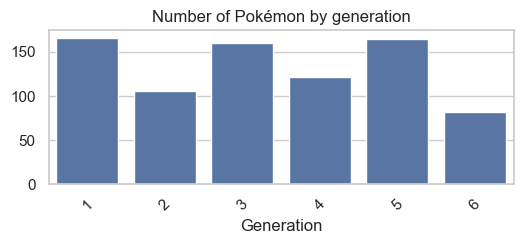

In [31]:
generation_counts=df['Generation'].value_counts()
print(generation_counts)
plt.figure(figsize=(6,2))
sns.barplot(x=generation_counts.index, y=generation_counts.values)
plt.title("Number of Pokémon by generation")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Find the rarest types
rare_types = type_counts[type_counts == type_counts.min()]
print(f"The rarest type ({type_counts.min()}):")
print(rare_types)

The rarest type (4):
Type 1
Flying    4
Name: count, dtype: int64


In [14]:
#Most common type
common_types = type_counts[type_counts==type_counts.max()]
print(f" The most common type ({type_counts.max()}):")
print(common_types)

 The most common type (112):
Type 1
Water    112
Name: count, dtype: int64


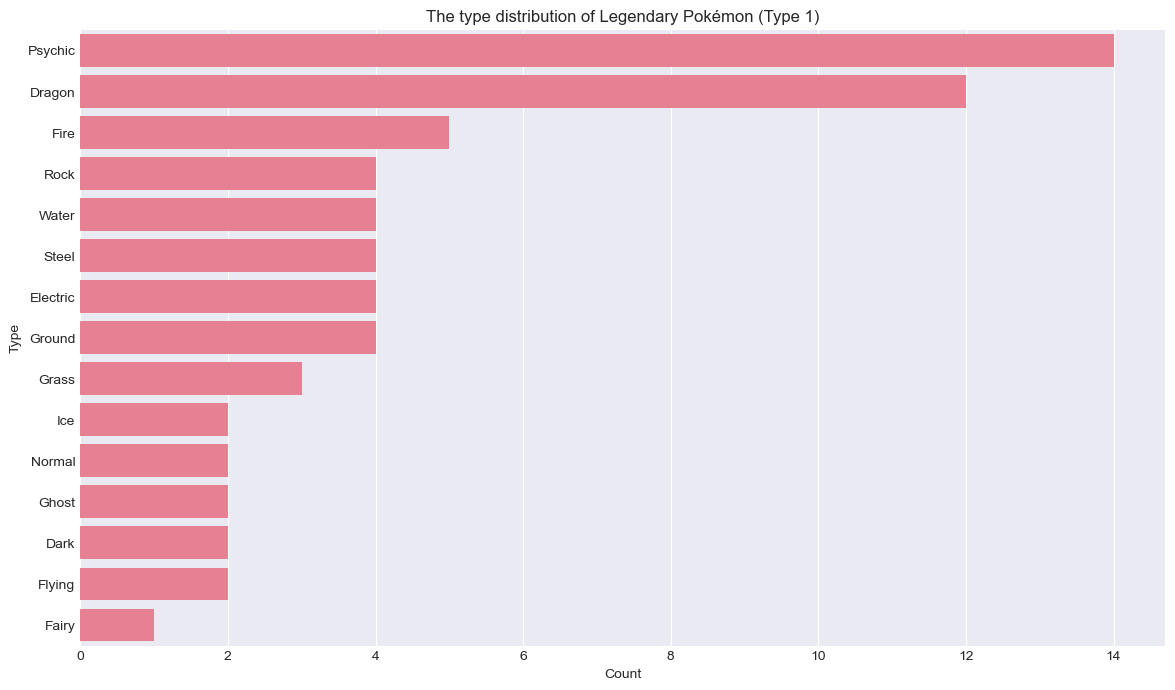

In [16]:
# Choose legendary pokemon
legendary_df = df[df['Legendary'] == True]
plt.figure(figsize=(14, 8))
# The number of legendary pokemon
legendary_type1_counts=legendary_df['Type 1'].value_counts()

# Graph
sns.barplot(x=legendary_type1_counts.values, y=legendary_type1_counts.index)
plt.title('The type distribution of Legendary Pokémon (Type 1)')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()



In [17]:
# Find strongest by each stat
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for stat in stats:
    top_pokemon = df.loc[df[stat].idxmax()]
    print(f"Highest {stat}: {top_pokemon['Name']} ({top_pokemon[stat]} {stat})")

Highest HP: Blissey (255 HP)
Highest Attack: MewtwoMega Mewtwo X (190 Attack)
Highest Defense: SteelixMega Steelix (230 Defense)
Highest Sp. Atk: MewtwoMega Mewtwo Y (194 Sp. Atk)
Highest Sp. Def: Shuckle (230 Sp. Def)
Highest Speed: DeoxysSpeed Forme (180 Speed)


In [18]:
# Find weakest Pokémon (by total stats)
if 'Total' not in df.columns:
    df['Total'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

weakest = df.nsmallest(5, 'Total')[['Name', 'Type 1', 'Total']]
print("Top 5 Weakest Pokémon:")
print(weakest.to_string(index=False))

Top 5 Weakest Pokémon:
     Name Type 1  Total
  Sunkern  Grass    180
  Azurill Normal    190
Kricketot    Bug    194
 Caterpie    Bug    195
   Weedle    Bug    195


In [19]:
# Find Pokémon with most balanced stats (lowest standard deviation)
stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df['Stat_Deviation'] = df[stats_columns].std(axis=1)

most_balanced = df.nsmallest(5, 'Stat_Deviation')[['Name', 'Type 1', 'Stat_Deviation']]
print("Most Balanced Pokémon (lowest stat variation):")
print(most_balanced.to_string(index=False))

Most Balanced Pokémon (lowest stat variation):
   Name   Type 1  Stat_Deviation
  Ditto   Normal             0.0
    Mew  Psychic             0.0
Sunkern    Grass             0.0
Tyrogue Fighting             0.0
 Celebi  Psychic             0.0


In [20]:
# Categorize Pokémon by speed tiers
speed_bins = [0, 50, 70, 90, 110, 200]
speed_labels = ['Very Slow', 'Slow', 'Average', 'Fast', 'Very Fast']

df['Speed_Tier'] = pd.cut(df['Speed'], bins=speed_bins, labels=speed_labels)
speed_tier_counts = df['Speed_Tier'].value_counts().sort_index()

print("Speed Tier Distribution:")
print(speed_tier_counts)

Speed Tier Distribution:
Speed_Tier
Very Slow    263
Slow         200
Average      151
Fast         131
Very Fast     55
Name: count, dtype: int64


In [21]:
# Find top attacker for each type
for pokemon_type in df['Type 1'].unique():
    type_data = df[df['Type 1'] == pokemon_type]
    top_attacker = type_data.loc[type_data['Attack'].idxmax()]
    print(f"{pokemon_type}: {top_attacker['Name']} (Attack: {top_attacker['Attack']})")

Grass: AbomasnowMega Abomasnow (Attack: 132)
Fire: BlazikenMega Blaziken (Attack: 160)
Water: GyaradosMega Gyarados (Attack: 155)
Bug: HeracrossMega Heracross (Attack: 185)
Normal: Slaking (Attack: 160)
Poison: Toxicroak (Attack: 106)
Electric: Electivire (Attack: 123)
Ground: GroudonPrimal Groudon (Attack: 180)
Fairy: Xerneas (Attack: 131)
Fighting: LucarioMega Lucario (Attack: 145)
Psychic: MewtwoMega Mewtwo X (Attack: 190)
Rock: Rampardos (Attack: 165)
Ghost: BanetteMega Banette (Attack: 165)
Ice: Mamoswine (Attack: 130)
Dragon: RayquazaMega Rayquaza (Attack: 180)
Dark: AbsolMega Absol (Attack: 150)
Steel: AegislashBlade Forme (Attack: 150)
Flying: TornadusIncarnate Forme (Attack: 115)


In [22]:
# Find fastest Pokémon for each type
fastest_by_type = {}
for pokemon_type in df['Type 1'].unique():
    type_data = df[df['Type 1'] == pokemon_type]
    fastest = type_data.nlargest(1, 'Speed').iloc[0]
    fastest_by_type[pokemon_type] = (fastest['Name'], fastest['Speed'])

print("Fastest Pokémon by Type:")
for ptype, (name, speed) in fastest_by_type.items():
    print(f"{ptype}: {name} ({speed} Speed)")

Fastest Pokémon by Type:
Grass: SceptileMega Sceptile (145 Speed)
Fire: Talonflame (126 Speed)
Water: Greninja (122 Speed)
Bug: Ninjask (160 Speed)
Normal: LopunnyMega Lopunny (135 Speed)
Poison: Crobat (130 Speed)
Electric: Electrode (140 Speed)
Ground: Dugtrio (120 Speed)
Fairy: Xerneas (99 Speed)
Fighting: Hawlucha (118 Speed)
Psychic: DeoxysSpeed Forme (180 Speed)
Rock: AerodactylMega Aerodactyl (150 Speed)
Ghost: GengarMega Gengar (130 Speed)
Ice: Froslass (110 Speed)
Dragon: SalamenceMega Salamence (120 Speed)
Dark: Weavile (125 Speed)
Steel: MetagrossMega Metagross (110 Speed)
Flying: Noivern (123 Speed)


In [25]:
# Create a random balanced team of 6 Pokémon
import random

# Ensure diversity by type
random_team = []
types_covered = set()

while len(random_team) < 6 and len(types_covered) < len(df['Type 1'].unique()):
    random_pokemon = df.sample(1).iloc[0]
    if random_pokemon['Type 1'] not in types_covered:
        random_team.append(random_pokemon['Name'])
        types_covered.add(random_pokemon['Type 1'])

print("Random Balanced Team (by type diversity):")
for i, pokemon in enumerate(random_team, 1):
    print(f"{i}. {pokemon}")

Random Balanced Team (by type diversity):
1. Ninetales
2. Aggron
3. Noctowl
4. Gulpin
5. GardevoirMega Gardevoir
6. Horsea


**MACHINE LEARNING PART**
Simple Classification Model

In [54]:

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

#**Load and explore**#

In [28]:
# Load the dataset
df = pd.read_csv(r'C:\Users\tavan\Downloads\archive\Pokemon.csv')

# Display basic information
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(df[['Name', 'Type 1', 'HP', 'Attack', 'Defense']].head())

Shape: (800, 13)
Columns: ['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']

First 5 rows:
                    Name Type 1  HP  Attack  Defense
0              Bulbasaur  Grass  45      49       49
1                Ivysaur  Grass  60      62       63
2               Venusaur  Grass  80      82       83
3  VenusaurMega Venusaur  Grass  80     100      123
4             Charmander   Fire  39      52       43


#**Data preparation**#

In [31]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,  # For reproducibility
    stratify=y  # Keep class distribution
)

print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training samples: 640 (80.0%)
Testing samples: 160 (20.0%)
Training shape: (640, 6)
Testing shape: (160, 6)


In [32]:
# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n FEATURE SCALING")
print("=" * 40)
print("Features scaled using StandardScaler")
print(f"Mean after scaling (first feature): {X_train_scaled[:, 0].mean():.2f}")
print(f"Std after scaling (first feature): {X_train_scaled[:, 0].std():.2f}")


 FEATURE SCALING
Features scaled using StandardScaler
Mean after scaling (first feature): -0.00
Std after scaling (first feature): 1.00


TRAIN LOGISTIC REGRESSION MODEL

In [34]:
# Create and train the model
model = LogisticRegression(
    max_iter=1000,      # More iterations for convergence
    random_state=42,
    multi_class='multinomial'
)

# Train the model
model.fit(X_train_scaled, y_train)
print("Model: Logistic Regression")
print(f"Classes learned: {len(model.classes_)}")
print(f"Training complete!")

Model: Logistic Regression
Classes learned: 18
Training complete!


C:\Users\tavan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


MODEL EVALUATION

In [37]:
def evaluate_model(model, X_train, X_test, y_train, y_test, label_encoder):
  
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_acc:.2%}")
    print(f"Testing Accuracy: {test_acc:.2%}")
    
    # Detailed classification report
   
    print(classification_report(y_test, y_test_pred, 
                                target_names=label_encoder.classes_))
    
    return train_acc, test_acc, y_test_pred

# Evaluate the model
train_accuracy, test_accuracy, predictions = evaluate_model(
    model, X_train_scaled, X_test_scaled, 
    y_train, y_test, label_encoder
)

Training Accuracy: 26.41%
Testing Accuracy: 18.75%
              precision    recall  f1-score   support

         Bug       0.14      0.21      0.17        14
        Dark       0.00      0.00      0.00         6
      Dragon       0.11      0.17      0.13         6
    Electric       0.20      0.22      0.21         9
       Fairy       0.00      0.00      0.00         3
    Fighting       0.00      0.00      0.00         5
        Fire       0.00      0.00      0.00        10
      Flying       0.00      0.00      0.00         1
       Ghost       0.00      0.00      0.00         6
       Grass       0.00      0.00      0.00        14
      Ground       0.50      0.17      0.25         6
         Ice       0.00      0.00      0.00         5
      Normal       0.42      0.55      0.48        20
      Poison       0.00      0.00      0.00         6
     Psychic       0.14      0.08      0.11        12
        Rock       0.22      0.22      0.22         9
       Steel       0.14      0

C:\Users\tavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



 FEATURE IMPORTANCE
Most important features for type prediction:
Feature  Importance
Sp. Atk    0.621849
Defense    0.469256
 Attack    0.458346
     HP    0.395091
  Speed    0.289272
Sp. Def    0.191687


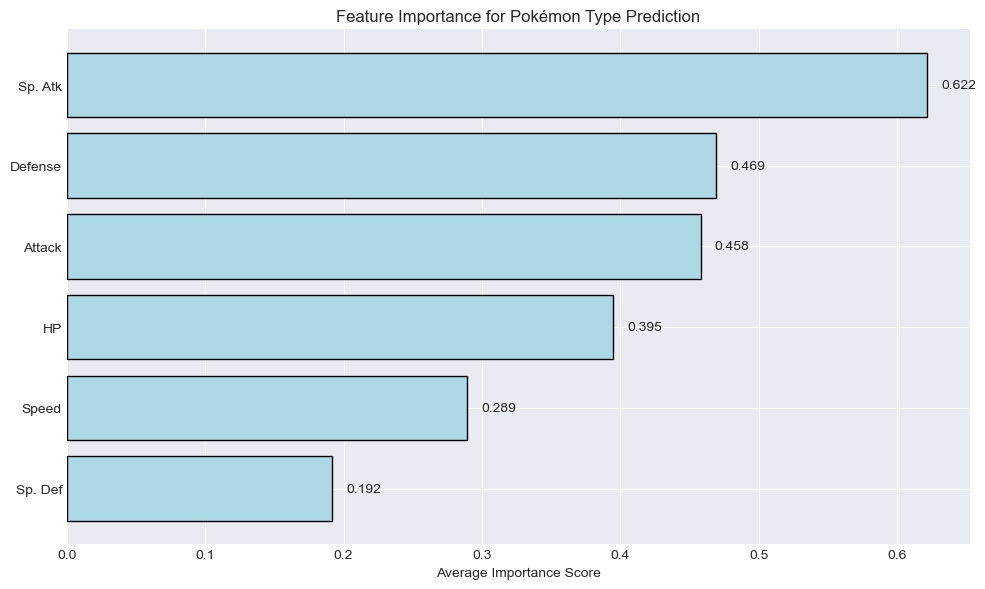

In [38]:
def analyze_feature_importance(model, feature_names):
    """Analyze which features are most important"""
    
    # Get coefficients (importance weights)
    coefficients = model.coef_
    
    # Calculate average importance across all classes
    avg_importance = np.mean(np.abs(coefficients), axis=0)
    
    # Create DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': avg_importance
    }).sort_values('Importance', ascending=False)
    
    print("\n FEATURE IMPORTANCE")
    print("Most important features for type prediction:")
    print(importance_df.to_string(index=False))
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    bars = plt.barh(importance_df['Feature'], importance_df['Importance'], 
                    color='lightblue', edgecolor='black')
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', va='center')
    
    plt.xlabel('Average Importance Score')
    plt.title('Feature Importance for Pokémon Type Prediction')
    plt.gca().invert_yaxis()  # Highest importance on top
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300)
    plt.show()
    
    return importance_df

# Analyze feature importance
feature_importance = analyze_feature_importance(model, feature_names)

In [43]:
def predict_new_pokemon(model, scaler, label_encoder, stats_dict):
    
    # Convert stats to array
    stats_array = np.array([[
        stats_dict['HP'],
        stats_dict['Attack'],
        stats_dict['Defense'],
        stats_dict['Sp. Atk'],
        stats_dict['Sp. Def'],
        stats_dict['Speed']
    ]])
    
    # Scale the stats
    stats_scaled = scaler.transform(stats_array)
    
    # Make prediction
    predicted_class = model.predict(stats_scaled)[0]
    predicted_prob = model.predict_proba(stats_scaled)[0]
    
    # Get top 3 predictions
    top_3_idx = np.argsort(predicted_prob)[-3:][::-1]
    top_3_types = label_encoder.inverse_transform(top_3_idx)
    top_3_probs = predicted_prob[top_3_idx]
    
    return top_3_types, top_3_probs

# Test with example Pokémon
print("\n EXAMPLE PREDICTIONS")

# Example 1: Pikachu-like stats
pikachu_stats = {
    'Name': 'Pikachu-like',
    'HP': 35,
    'Attack': 55,
    'Defense': 40,
    'Sp. Atk': 50,
    'Sp. Def': 50,
    'Speed': 90
}

top_types, top_probs = predict_new_pokemon(
    model, scaler, label_encoder, pikachu_stats
)

print(f"\n{pikachu_stats['Name']}:")
print(f"Stats: HP:{pikachu_stats['HP']}, Atk:{pikachu_stats['Attack']}, "
      f"Def:{pikachu_stats['Defense']}, Spd:{pikachu_stats['Speed']}")
print("Top 3 predicted types:")
for i, (type_name, prob) in enumerate(zip(top_types, top_probs), 1):
    print(f"  {i}. {type_name}: {prob:.2%}")


 EXAMPLE PREDICTIONS

Pikachu-like:
Stats: HP:35, Atk:55, Def:40, Spd:90
Top 3 predicted types:
  1. Electric: 20.93%
  2. Bug: 19.61%
  3. Normal: 13.93%


C:\Users\tavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
import pickle
def save_ml_model(model, scaler, label_encoder, accuracy, features):
    """Save the trained model and components"""
    
    model_data = {
        'model': model,
        'scaler': scaler,
        'label_encoder': label_encoder,
        'accuracy': accuracy,
        'features': features,
        'timestamp': pd.Timestamp.now()
    }
    
    # Save using pickle
    with open('pokemon_ml_model.pkl', 'wb') as f:
        pickle.dump(model_data, f)
    
    print("MODEL SAVED")
    print(f"File: pokemon_ml_model.pkl")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Features: {features}")
    print(f"Saved at: {model_data['timestamp']}")

# Save the model
save_ml_model(model, scaler, label_encoder, test_accuracy, feature_names)

def load_ml_model(filename='pokemon_ml_model.pkl'):
    """Load a saved model"""
    
    try:
        with open(filename, 'rb') as f:
            model_data = pickle.load(f)
        
        print("\n MODEL LOADED")
        print("=" * 40)
        print(f"Model type: {type(model_data['model']).__name__}")
        print(f"Accuracy: {model_data['accuracy']:.2%}")
        print(f"Features: {model_data['features']}")
        
        return model_data
    except FileNotFoundError:
        print(f"Error: {filename} not found!")
        return None

# Load the model (for demonstration)
loaded_model = load_ml_model()

MODEL SAVED
File: pokemon_ml_model.pkl
Accuracy: 18.75%
Features: ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
Saved at: 2026-01-20 15:41:24.085237

 MODEL LOADED
Model type: LogisticRegression
Accuracy: 18.75%
Features: ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']


In [48]:

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Accuracy: {cv_scores.mean():.2%}")

Cross-Validation Scores: [0.25      0.234375  0.2109375 0.2265625 0.265625 ]
Average CV Accuracy: 23.75%


C:\Users\tavan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\tavan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\tavan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\tavan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to 

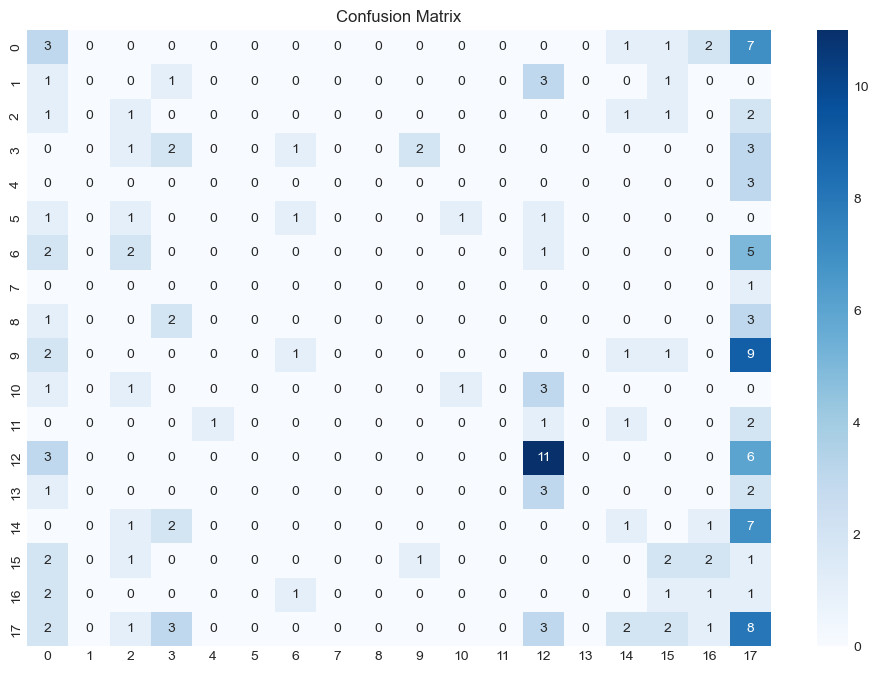

In [50]:
#visualizing confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()